In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [77]:
cols = [
    "NumTimesPreg", "Glucose", "BloodP",
    "SkinThick", "Insulin", "BMI",
    "DiPedFunc", "Age", "Outcome"]
data_df = pd.read_csv('data/pima_indians.csv', header=None, names=cols)

In [78]:
"""
outcome- column going to predict
   0 - not diabetic
   1 - is diabetic
"""

data_df.head()

NumTimesPreg  Glucose  BloodP  SkinThick  Insulin   BMI  DiPedFunc  Age  \
0             6      148      72         35        0  33.6      0.627   50   
1             1       85      66         29        0  26.6      0.351   31   
2             8      183      64          0        0  23.3      0.672   32   
3             1       89      66         23       94  28.1      0.167   21   
4             0      137      40         35      168  43.1      2.288   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1

In [79]:
data_df.shape

(768, 9)

In [118]:
data_df.describe()

NumTimesPreg     Glucose      BloodP   SkinThick     Insulin  \
count    768.000000  768.000000  768.000000  768.000000  768.000000   
mean       3.845052  120.894531   69.105469   20.536458   79.799479   
std        3.369578   31.972618   19.355807   15.952218  115.244002   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        1.000000   99.000000   62.000000    0.000000    0.000000   
50%        3.000000  117.000000   72.000000   23.000000   30.500000   
75%        6.000000  140.250000   80.000000   32.000000  127.250000   
max       17.000000  199.000000  122.000000   99.000000  846.000000   

              BMI   DiPedFunc         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [80]:
data_df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

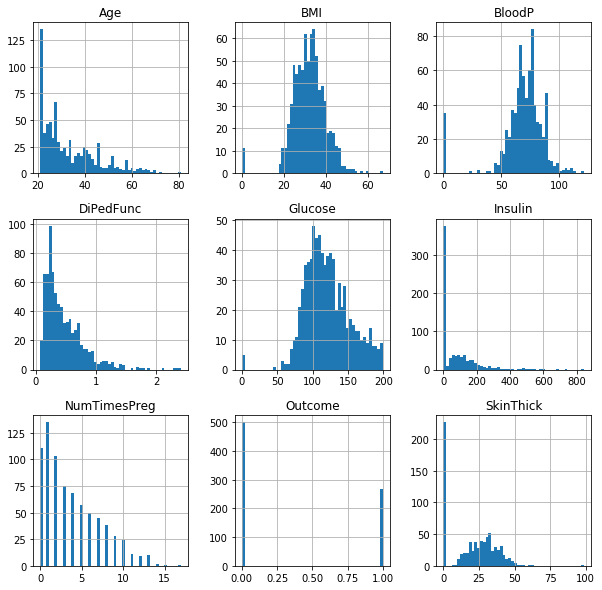

In [81]:
data_df.hist(figsize=(10,10),bins=50);

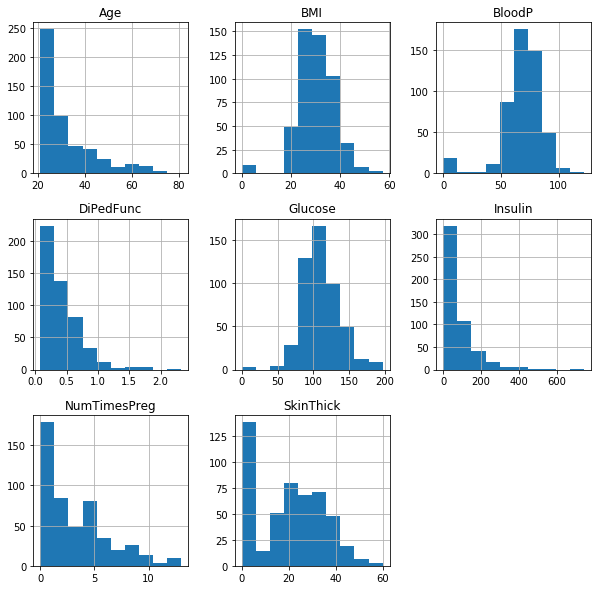

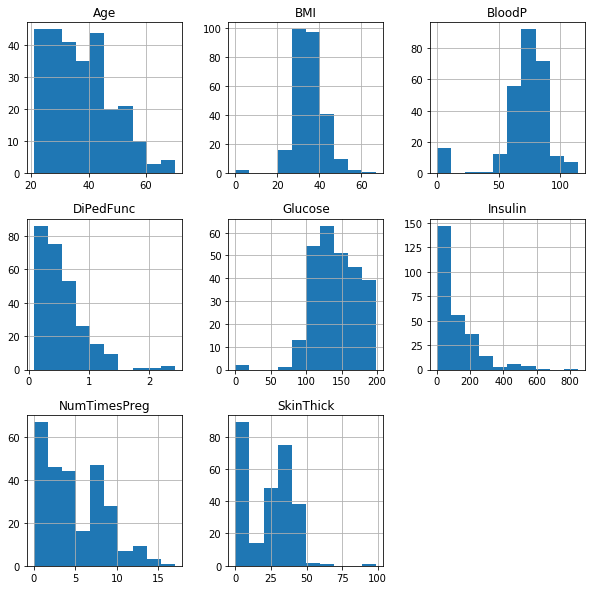

In [82]:
data_df.groupby('Outcome').hist(figsize=(10,10));

In [83]:
"""
correlation matrix is a tool to understand correlation between different features.  The values range from -1 to 1. 
The closer a value is to 1, the better correlation there is between 2 features.

"""
corr = data_df.corr()
corr

NumTimesPreg   Glucose    BloodP  SkinThick   Insulin       BMI  \
NumTimesPreg      1.000000  0.129459  0.141282  -0.081672 -0.073535  0.017683   
Glucose           0.129459  1.000000  0.152590   0.057328  0.331357  0.221071   
BloodP            0.141282  0.152590  1.000000   0.207371  0.088933  0.281805   
SkinThick        -0.081672  0.057328  0.207371   1.000000  0.436783  0.392573   
Insulin          -0.073535  0.331357  0.088933   0.436783  1.000000  0.197859   
BMI               0.017683  0.221071  0.281805   0.392573  0.197859  1.000000   
DiPedFunc        -0.033523  0.137337  0.041265   0.183928  0.185071  0.140647   
Age               0.544341  0.263514  0.239528  -0.113970 -0.042163  0.036242   
Outcome           0.221898  0.466581  0.065068   0.074752  0.130548  0.292695   

              DiPedFunc       Age   Outcome  
NumTimesPreg  -0.033523  0.544341  0.221898  
Glucose        0.137337  0.263514  0.466581  
BloodP         0.041265  0.239528  0.065068  
SkinThick      0.183928 -0.113970  0.074752  
Insulin        0.185071 -0.042163  0.130548  
BMI            0.140647  0.036242  0.292695  
DiPedFunc      1.000000  0.033561  0.173844  
Age            0.033561  1.000000  0.238356  
Outcome        0.173844  0.238356  1.000000

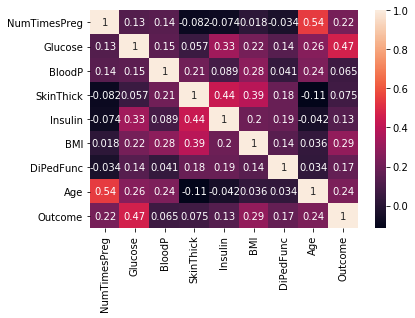

In [84]:
sns.heatmap(corr, annot=True);

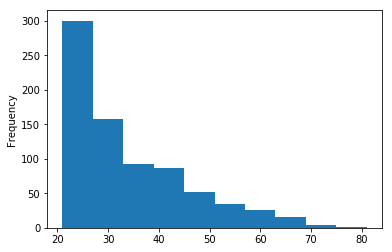

In [85]:
data_df['Age'].plot(kind='hist');

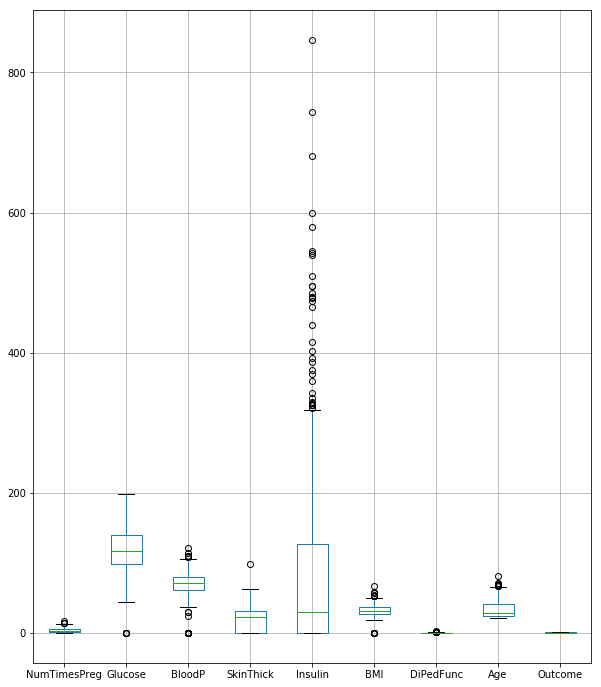

In [116]:
data_df.boxplot(figsize=(10,12));

In [117]:
data_df[data_df['Insulin'] > 600]

NumTimesPreg  Glucose  BloodP  SkinThick  Insulin   BMI  DiPedFunc  Age  \
13              1      189      60         23      846  30.1      0.398   59   
228             4      197      70         39      744  36.7      2.329   31   
247             0      165      90         33      680  52.3      0.427   23   

     Outcome  
13         1  
228        0  
247        0

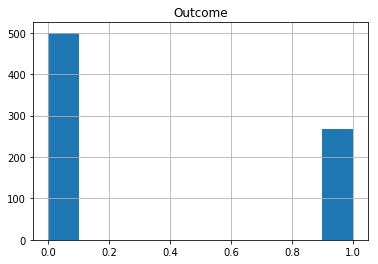

In [86]:
data_df.hist('Outcome');

### Data Cleaning
In the data cleaning process there are several factors to consider:<br>
Are there any null values?<br>
Are there any outliers?



In [88]:
data_df.isnull().sum()

NumTimesPreg    0
Glucose         0
BloodP          0
SkinThick       0
Insulin         0
BMI             0
DiPedFunc       0
Age             0
Outcome         0
dtype: int64

In [89]:
# BllodP of 0?
data_df[data_df['BloodP'] == 0].shape[0]

35

In [90]:
data_df[data_df.BloodP == 0].groupby('Outcome').count()

NumTimesPreg  Glucose  BloodP  SkinThick  Insulin  BMI  DiPedFunc  \
Outcome                                                                      
0                  19       19      19         19       19   19         19   
1                  16       16      16         16       16   16         16   

         Age  
Outcome       
0         19  
1         16

In [91]:
data_df[data_df['Glucose'] == 0].shape[0]

5

In [92]:
data_df[data_df.Glucose == 0].groupby('Outcome').count()

NumTimesPreg  Glucose  BloodP  SkinThick  Insulin  BMI  DiPedFunc  \
Outcome                                                                      
0                   3        3       3          3        3    3          3   
1                   2        2       2          2        2    2          2   

         Age  
Outcome       
0          3  
1          2

In [93]:
data_df[data_df['BMI'] == 0].shape[0]

11

In [94]:
data_df[data_df.BMI == 0].groupby('Outcome').count()

NumTimesPreg  Glucose  BloodP  SkinThick  Insulin  BMI  DiPedFunc  \
Outcome                                                                      
0                   9        9       9          9        9    9          9   
1                   2        2       2          2        2    2          2   

         Age  
Outcome       
0          9  
1          2

In [95]:
data_df[data_df['Insulin'] == 0].shape[0]

374

In [96]:
data_df[data_df.Insulin == 0].groupby('Outcome').count()

NumTimesPreg  Glucose  BloodP  SkinThick  Insulin  BMI  DiPedFunc  \
Outcome                                                                      
0                 236      236     236        236      236  236        236   
1                 138      138     138        138      138  138        138   

         Age  
Outcome       
0        236  
1        138

In [97]:
"""
remove 'BloodP”, “BMI” and “Glucose” where == 0 
"""
diabetes_mod = data_df[(data_df.BloodP != 0) & (data_df.BMI != 0) & (data_df.Glucose != 0)]

In [98]:
diabetes_mod.head()

NumTimesPreg  Glucose  BloodP  SkinThick  Insulin   BMI  DiPedFunc  Age  \
0             6      148      72         35        0  33.6      0.627   50   
1             1       85      66         29        0  26.6      0.351   31   
2             8      183      64          0        0  23.3      0.672   32   
3             1       89      66         23       94  28.1      0.167   21   
4             0      137      40         35      168  43.1      2.288   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1

In [99]:
# (768, 9)
diabetes_mod.shape

(724, 9)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

### Feature Scaling

In [102]:
from sklearn.preprocessing import MinMaxScaler as Scaler

"""
scaler.fit(df.drop('TARGET CLASS’,axis=1))

#transform the data
scaled_features = scaler.transform(df.drop('TARGET CLASS’,axis=1))
"""

scaler = Scaler()
scaler.fit(diabetes_mod.drop('Outcome', axis=1))
scaled_features = scaler.transform(diabetes_mod.drop('Outcome', axis=1))


In [103]:
#X = diabetes_mod.drop('Outcome', axis=1)
X = scaled_features
y = diabetes_mod['Outcome']

### Evaluation Methods

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

In [106]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.736402
1  SVC  0.744770
2   LR  0.728033
3   DT  0.686192
4  GNB  0.690377
5   RF  0.715481
6   GB  0.723849


K Fold Cross Validation

In [107]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)


  Name     Score
0  KNN  0.740477
1  SVC  0.772273
2   LR  0.770923
3   DT  0.699345
4  GNB  0.755681
5   RF  0.733609
6   GB  0.765461


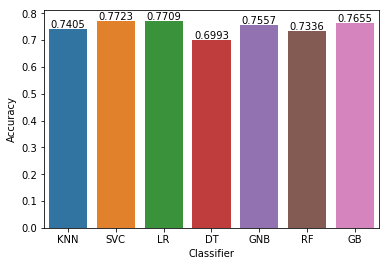

In [108]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
   